**Task 3 - Cats and Dogs image classification using SVM.**

**LOADING DATA FROM KAGGLE USING API**

In [ ]:
from google.colab import files
uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images

Dataset URL: https://www.kaggle.com/datasets/chetankv/dogs-cats-images
License(s): CC0-1.0
 96% 417M/435M [00:05<00:00, 116MB/s]
100% 435M/435M [00:06<00:00, 75.4MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "/content/dogs-cats-images.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


**IMPORTING REQUIRED LIBRARIES**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


**PREPROCESSING**

In [ ]:
def load_and_preprocess_images(directory, num_samples=None):
    features = []
    labels = []
    count_cats = 0
    count_dogs = 0

    # Load cats (class 0)
    class_label = 0
    class_dir = os.path.join(directory, 'cats')
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))
        img = img.astype('float32') / 255.0
        features.append(img.flatten())
        labels.append(class_label)
        count_cats += 1
        if num_samples and count_cats >= num_samples // 2:
            break

    # Load dogs (class 1)
    class_label = 1
    class_dir = os.path.join(directory, 'dogs')
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, (64, 64))  # Resize image to 64x64
        img = img.astype('float32') / 255.0  # Normalize pixel values
        features.append(img.flatten())  # Flatten image array
        labels.append(class_label)
        count_dogs += 1
        if num_samples and count_dogs >= num_samples // 2:
            break

    return np.array(features), np.array(labels)

**SPLITTING TEST AND TRAIN DATA**

In [ ]:
train_dir = '/content/dataset/training_set'
test_dir = '/content/dataset/test_set'

In [ ]:
X_train, y_train = load_and_preprocess_images(train_dir, num_samples=1000)
X_test, y_test = load_and_preprocess_images(test_dir, num_samples=500)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

**SVM ALGORITHM**

In [ ]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {accuracy}')


y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

Validation Accuracy: 0.585
Test Accuracy: 0.585


**PREDICTING THE REAL TIME IMAGE**

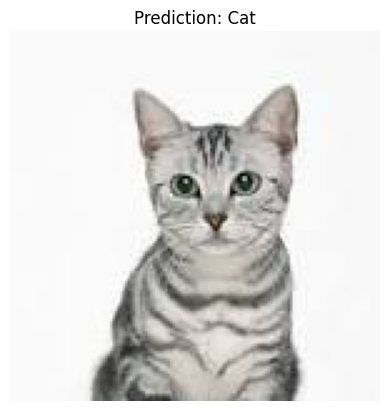

The image is a: Cat


In [ ]:
def predict_image(img, model):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32') / 255.0
    img_flatten = img.flatten()
    prediction = model.predict([img_flatten])
    return 'Dog' if prediction == 1 else 'Cat'

img_path = '/content/download (1).jpg'
img = cv2.imread(img_path)
result = predict_image(img, svm)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f'Prediction: {result}')
plt.axis('off')
plt.show()


print(f'The image is a: {result}')

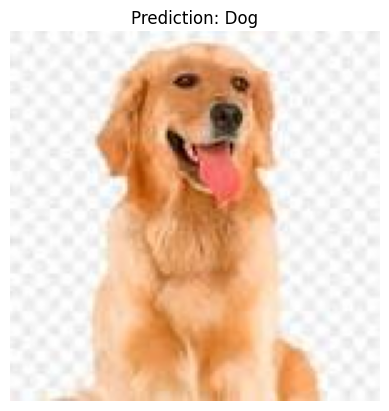

The image is a: Dog


In [ ]:
def predict_image(img, model):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (64, 64))
    img = img.astype('float32') / 255.0
    img_flatten = img.flatten()
    prediction = model.predict([img_flatten])
    return 'Dog' if prediction == 1 else 'Cat'

img_path = '/content/download.jpg'
img = cv2.imread(img_path)
result = predict_image(img, svm)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f'Prediction: {result}')
plt.axis('off')
plt.show()


print(f'The image is a: {result}')